### Config

In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
from hydra import compose, initialize
from pathlib import Path
from omegaconf import OmegaConf

initialize(config_path="../config", version_base="1.3")
cfg = compose(config_name="config")
print(OmegaConf.to_yaml(cfg))

sys.path.insert(0, str(cfg.paths.project_root))

from src.activation_recorder import MultiPromptActivations
from src.time_series_activations import MultiPromptTimeSeries
from src.phyid_decomposition import MultiPromptPhyID, PromptPhyID, PhyIDTimeSeries


paths:
  project_root: /home/p84400019/projects/consciousness-llms/IT-LLMs/
  model_path: ${model.company}/${model.model_family}/${model.model_size}/${model.it}/
  activation_method: ${time_series.node_type}/${time_series.node_activation}/${time_series.projection_method}/
  phyid_method: ${paths.activation_method}phyid_tau-${phyid.tau}/phyid_kind-${phyid.kind}/phyid_redundancy-${phyid.redundancy}/
  deactivation_method: deactivate_k_nodes_per_iteration-${deactivation_analysis.deactivate_k_nodes_per_iteration}/max_deactivated_nodes-${deactivation_analysis.max_deactivated_nodes}/n_randomised_runs-${deactivation_analysis.n_randomised_runs}/micro_batch_size-${deactivation_analysis.micro_batch_size}/reverse_kl-${deactivation_analysis.reverse_kl}/run_reverse_ranking-${deactivation_analysis.run_reverse_ranking}/noise_std-${deactivation_analysis.noise_std}/
  data_dir: ${paths.project_root}data/${paths.model_path}${generation.name}/
  data_activations_dir: ${paths.data_dir}activations/
  data_

/home/p84400019/miniconda3/envs/int/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Time Series Loading

In [2]:
data_activations_file = cfg.paths.data_activations_file
activations = MultiPromptActivations.load(file_path=data_activations_file)

MultiPromptActivations successfully loaded from '/home/p84400019/projects/consciousness-llms/IT-LLMs/data/meta/llama-3/1B/instruct/subset/activations/multi_prompt_activations.pkl'.


In [3]:
time_series = MultiPromptTimeSeries.from_activations(
    activations, 
    node_type=cfg.time_series.node_type,
    node_activation=cfg.time_series.node_activation,
    projection_method=cfg.time_series.projection_method, 
    exclude_shared_expert_moe=cfg.time_series.exclude_shared_expert_moe, 
)
time_series.plot(token_x=True, ticks_all_layers=True)#, plot_dir=cfg.paths.plot_time_series_dir)

#### Single Time Series

In [25]:
ts = time_series.prompts[10]
ts.plot_two_series(series_a=(14,8), series_b=(15,5), tokens=range(0,64), plot_dir=cfg.paths.plot_time_series_dir)

Two-series SVG saved to /home/p84400019/projects/consciousness-llms/IT-LLMs/plots/meta/llama-3/1B/instruct/subset/time_series/attention/attention_outputs/norm/


### PhyID Decomposition

In [21]:
compute_phyid = False
data_phyid_path = cfg.paths.data_phyid_dir

if compute_phyid:
    phyid_comp = MultiPromptPhyID.from_time_series(
        time_series,
        cfg.phyid.tau,
        cfg.phyid.kind,
        cfg.phyid.redundancy
    ) 
    phyid_comp.save(dir_path=data_phyid_path)
phyid = MultiPromptPhyID.load_average_prompt_phyid(dir_path=data_phyid_path)

Average PromptPhyID loaded from /home/p84400019/projects/consciousness-llms/IT-LLMs/data/meta/llama-3/1B/instruct/original_prompts/phyid/attention/attention_outputs/norm/phyid_tau-1/phyid_kind-gaussian/phyid_redundancy-MMI/average.pkl


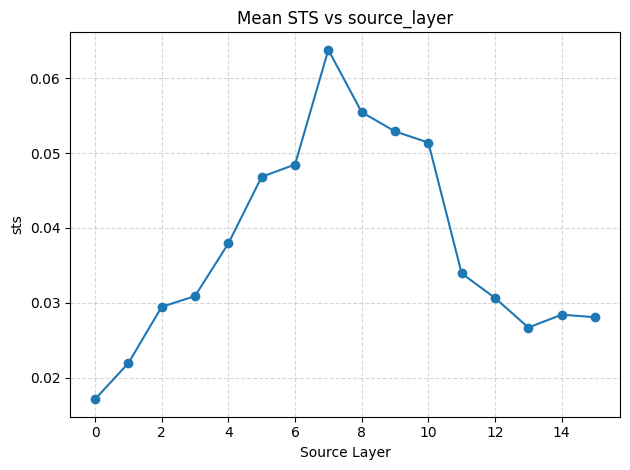

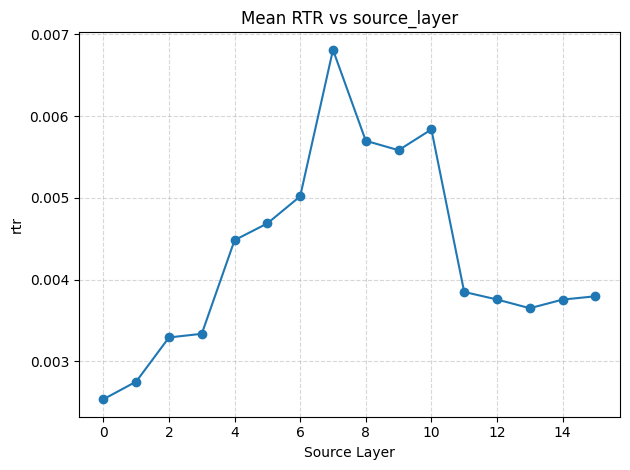

PNG saved to /home/p84400019/projects/consciousness-llms/IT-LLMs/plots/meta/llama-3/1B/instruct/original_prompts/phyid/attention/attention_outputs/norm/phyid_tau-1/phyid_kind-gaussian/phyid_redundancy-MMI/syn_minus_red_rank/rank_plot.png
SVG saved to /home/p84400019/projects/consciousness-llms/IT-LLMs/plots/meta/llama-3/1B/instruct/original_prompts/phyid/attention/attention_outputs/norm/phyid_tau-1/phyid_kind-gaussian/phyid_redundancy-MMI/syn_minus_red_rank/rank_plot.svg


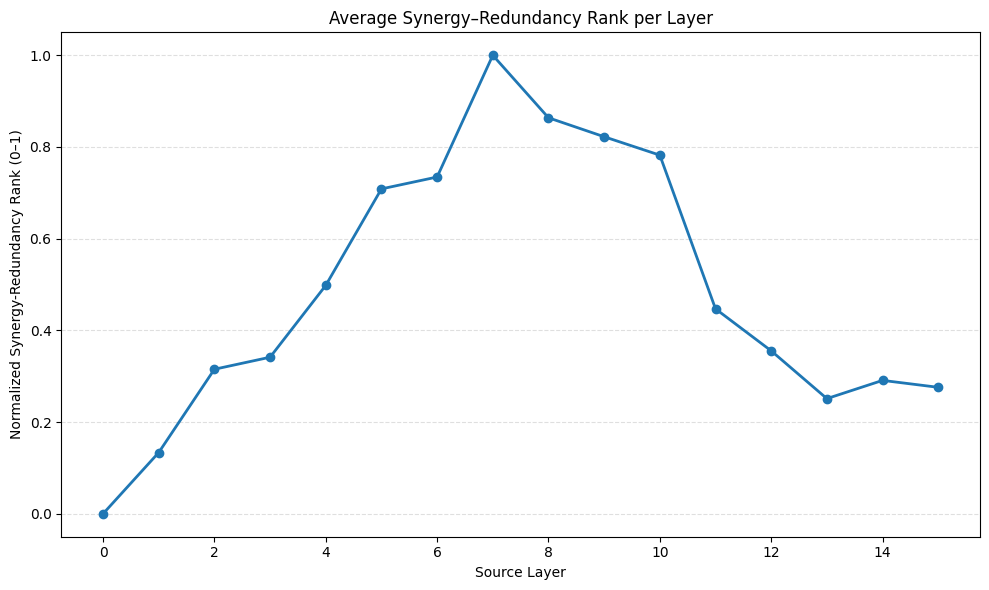

Synergy–Redundancy Rank of N03-L08: 497
Synergy–Redundancy Rank of N03-L08: 497


In [28]:
# phyid.node_heatmap(atom='sts', plot_dir=cfg.paths.plot_phyid_dir)
# phyid.node_heatmap(atom='rtr', plot_dir=cfg.paths.plot_phyid_dir)
phyid.plot_mean_along('sts', 'source_layer')#, plot_dir=cfg.paths.plot_phyid_dir)
phyid.plot_mean_along('rtr', 'source_layer')#, plot_dir=cfg.paths.plot_phyid_dir)
node_ranking = phyid.syn_minus_red_rank
phyid.plot_syn_minus_red_rank_per_node(node_ranking, save_svg=True, figsize=(12, 6), plot_dir=cfg.paths.plot_phyid_dir)
phyid.plot_syn_minus_red_rank_per_layer(node_ranking)
print(f"Synergy–Redundancy Rank of N03-L08: {node_ranking.sel(source_node=3, source_layer=8).values}")
print(f"Synergy–Redundancy Rank of N03-L08: {node_ranking.sel(source_node=3, source_layer=8).values}")

In [7]:
phyid.compute_extra_atoms()
phyid.build_data_array()

Computing extra atoms for layer 0, node 0 → layer 1, node 0


/home/p84400019/projects/consciousness-llms/IT-LLMs/src/phyid_decomposition/PhyIDTimeSeries.py:133: RuntimeWarning: invalid value encountered in divide
  setattr(self, f"{atom}_normalized", getattr(self, atom) / mi)


Computing extra atoms for layer 1, node 0 → layer 1, node 0
Computing extra atoms for layer 2, node 0 → layer 1, node 0
Computing extra atoms for layer 3, node 0 → layer 1, node 0
Computing extra atoms for layer 4, node 0 → layer 1, node 0
Computing extra atoms for layer 5, node 0 → layer 1, node 0
Computing extra atoms for layer 6, node 0 → layer 1, node 0
Computing extra atoms for layer 7, node 0 → layer 1, node 0
Computing extra atoms for layer 8, node 0 → layer 1, node 0
Computing extra atoms for layer 9, node 0 → layer 1, node 0
Computing extra atoms for layer 10, node 0 → layer 1, node 0
Computing extra atoms for layer 11, node 0 → layer 1, node 0
Computing extra atoms for layer 12, node 0 → layer 1, node 0
Computing extra atoms for layer 13, node 0 → layer 1, node 0
Computing extra atoms for layer 14, node 0 → layer 1, node 0
Computing extra atoms for layer 15, node 0 → layer 1, node 0


<xarray.DataArray 'phiid' (atom: 28, source_layer: 16, source_node: 8,
                           target_layer: 16, target_node: 8, time: 1)> Size: 2MB
array([[[[[[ 0.00000000e+00],
           [ 1.55859292e-02],
           [ 1.67546440e-02],
           ...,
           [ 1.52363461e-02],
           [ 1.36508241e-01],
           [ 2.81873550e-02]],

          [[ 3.07559082e-03],
           [ 1.14867404e-01],
           [ 1.54301524e-04],
           ...,
           [ 7.62400171e-03],
           [ 7.09368289e-02],
           [ 3.42393555e-02]],

          [[ 4.13132086e-03],
           [ 1.90411899e-02],
           [ 3.77167761e-03],
           ...,
...
           ...,
           [ 0.00000000e+00],
           [ 4.87632900e-02],
           [ 0.00000000e+00]],

          [[ 4.14771810e-02],
           [ 0.00000000e+00],
           [ 0.00000000e+00],
           ...,
           [ 0.00000000e+00],
           [ 1.84375104e-02],
           [ 2.00669896e-02]],

          [[ 0.00000000e+00],
           [-9.79307480e-03],
           [ 0.00000000e+00],
           ...,
           [ 0.00000000e+00],
           [ 6.63387999e-02],
           [ 0.00000000e+00]]]]]], dtype=float32)
Coordinates:
  * atom          (atom) <U45 5kB 'causal_density' 'copy' ... 'ytx' 'yty'
  * source_layer  (source_layer) int64 128B 0 1 2 3 4 5 6 ... 10 11 12 13 14 15
  * source_node   (source_node) int64 64B 0 1 2 3 4 5 6 7
  * target_layer  (target_layer) int64 128B 0 1 2 3 4 5 6 ... 10 11 12 13 14 15
  * target_node   (target_node) int64 64B 0 1 2 3 4 5 6 7
  * time          (time) int64 8B 0
Attributes:
    model:    EleutherAI/pythia-1b

In [8]:
phyid.__dict__.pop("syn_minus_red_rank", None)
phyid.syn_minus_red_rank
phyid.plot_synergy_rank_heatmap()

AttributeError: 'PromptPhyID' object has no attribute 'plot_synergy_rank_heatmap'

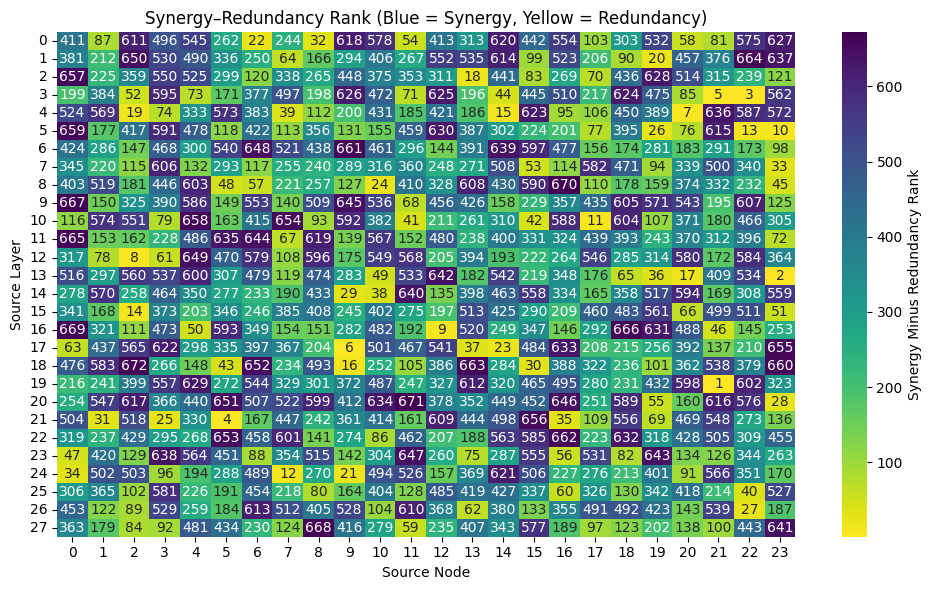

Plot saved to /home/p84400019/projects/consciousness-llms/IT-LLMs/plots/meta/llama-3/3B/random/base_prompt/phyid/attention/attention_outputs/norm/phyid_tau-1/phyid_kind-gaussian/phyid_redundancy-MMI/syn_minus_red_rank/rank_plot.png
Plot saved to /home/p84400019/projects/consciousness-llms/IT-LLMs/plots/meta/llama-3/3B/random/base_prompt/phyid/attention/attention_outputs/norm/phyid_tau-1/phyid_kind-gaussian/phyid_redundancy-MMI/syn_minus_red_rank/avg_synergy_score_per_layer.png


In [ ]:
node_ranking = phyid.syn_minus_red_rank
phyid.plot_syn_minus_red_rank_per_node(node_ranking, plot_dir=cfg.paths.plot_phyid_dir)
phyid.plot_syn_minus_red_rank_per_layer(node_ranking, plot_dir=cfg.paths.plot_phyid_dir)

In [ ]:
plot_dir = cfg.paths.plot_phyid_dir

phyid.node_heatmap(atom='sts', plot_dir=plot_dir)
phyid.plot_mean_along('sts', varying_dim='source_layer', plot_dir=plot_dir)
phyid.plot_mean_along('syn_minus_red', varying_dim='source_layer', plot_dir=plot_dir)
phyid.plot_mean_along('sts_normalized', varying_dim='source_layer', plot_dir=plot_dir)
phyid.plot_mean_along('rtr', varying_dim='source_layer', plot_dir=plot_dir)
phyid.plot_mean_along('mutual_information', varying_dim='source_layer', plot_dir=plot_dir)

Heatmap saved to /home/p84400019/projects/consciousness-llms/IT-LLMs/plots/meta/llama-3/3B/random/base_prompt/phyid/attention/attention_outputs/norm/phyid_tau-1/phyid_kind-gaussian/phyid_redundancy-MMI/node_heatmap/sts/heatmap.png
Plot saved to /home/p84400019/projects/consciousness-llms/IT-LLMs/plots/meta/llama-3/3B/random/base_prompt/phyid/attention/attention_outputs/norm/phyid_tau-1/phyid_kind-gaussian/phyid_redundancy-MMI/plot_mean_along/sts/source_layer.png
Plot saved to /home/p84400019/projects/consciousness-llms/IT-LLMs/plots/meta/llama-3/3B/random/base_prompt/phyid/attention/attention_outputs/norm/phyid_tau-1/phyid_kind-gaussian/phyid_redundancy-MMI/plot_mean_along/syn_minus_red/source_layer.png
Plot saved to /home/p84400019/projects/consciousness-llms/IT-LLMs/plots/meta/llama-3/3B/random/base_prompt/phyid/attention/attention_outputs/norm/phyid_tau-1/phyid_kind-gaussian/phyid_redundancy-MMI/plot_mean_along/sts_normalized/source_layer.png
Plot saved to /home/p84400019/projects/c

### Graph Theoretical Analysis

In [ ]:
from src.graph_theoretical_analysis import PromptGraphTheoreticalAnalysis

graph_theoretical = PromptGraphTheoreticalAnalysis.from_phyid_data(prompt_phyid=phyid)

In [ ]:
# graph_theoretical.plot_atom_graph(atom='sts')
sge = graph_theoretical.global_efficiency(atom='sts')
smo = graph_theoretical.modularity(atom='sts')
rge = graph_theoretical.global_efficiency(atom='rtr')
rmo = graph_theoretical.modularity(atom='rtr')
print(f"STS Global Efficiency: {sge}, STS Modularity: {smo}")
print(f"RTR Global Efficiency: {rge}, RTR Modularity: {rmo}")

STS Global Efficiency: 0.07378549225262356, STS Modularity: 0.034103109771126294
RTR Global Efficiency: 0.011879988444945878, RTR Modularity: 0.10393579895766247


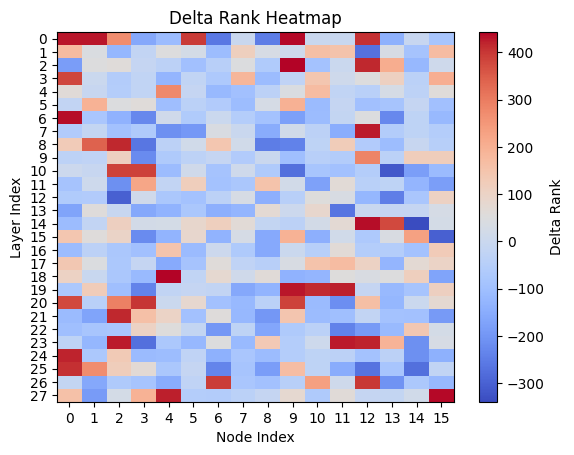

Gateways and Broadcasters: {'nodes': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 

In [ ]:
gb = graph_theoretical.gateways_and_broadcasters()
print(f"Gateways and Broadcasters: {gb}")